In [39]:
import warnings;
warnings.simplefilter('ignore')

In [40]:
#FB Prophet is a tool developed by Facebook for time series forecasting.

#It's a simple and flexible method for forecasting data points by analyzing patterns in historical data 
#and making predictions based on that analysis. It's designed to work well with time series that have patterns, 
#like daily or weekly seasonality, and is optimized for business forecasting problems.

In [3]:
#installing pystan and fbprophet
pip install pystan==2.19.1.1 prophet


  Using cached prophet-1.1.2-py3-none-win_amd64.whl (12.1 MB)
  Using cached cmdstanpy-1.1.0-py3-none-any.whl (83 kB)
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
Note: you may need to restart the kernel to use updated packages.


In [41]:
import pystan
from prophet import Prophet

In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


In [43]:
#reading the data
df2 = pd.read_csv(r'E:/python\Exxon.csv')

In [44]:
df2.head(4)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-01,45.580002,45.580002,44.290001,44.919998,40.703133,24412400
1,2021-02-02,45.810001,46.990002,45.279999,45.630001,41.346485,31940400
2,2021-02-03,45.630001,47.669998,45.419998,47.419998,42.968441,28459300
3,2021-02-04,47.880001,48.380001,47.250000,48.330002,43.793026,25280300


In [45]:
#Checking for null values
df2.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [46]:
print(df2.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [47]:
#change datatype
#date should be converted to datetime
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y-%m-%d')

In [48]:
#To build a dataset for fbprophet, we actually need just 2 columns, one is "ds" which represents dates
#and the other one is "y", which represents the target values. So, we need to drop the other columns.
df2.drop(["Open", 'High', 'Low','Adj Close', 'Volume'], axis = 1, inplace = True)

In [49]:
df2.head(3)


,Date,Close
0,2021-02-01,44.919998
1,2021-02-02,45.630001
2,2021-02-03,47.419998


In [51]:
#renaming columns
df2.rename(columns={"Date": "ds"}, inplace = True)
df2.rename(columns={"Close":"y"}, inplace = True)
df2.head(3)

,ds,y
0,2021-02-01,44.919998
1,2021-02-02,45.630001
2,2021-02-03,47.419998


In [52]:
###To train a Prophet model, create an object of Prophet(), fit it with the training data by calling the fit() function 
###and pass the data as an argument. 

#We can also customize the model by specifying arguments such as the type of growth and seasonality.

#By default, the model will automatically determine these features.


In [56]:


model_obj = Prophet(interval_width = 0.90, daily_seasonality = True)
model = model_obj.fit(df2)


DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:TBB already found in load path
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: C:\Users\User\AppData\Local\Temp\tmpc62u7h96\us_6c8h_.json
DEBUG:cmdstanpy:input tempfile: C:\Users\User\AppData\Local\Temp\tmpc62u7h96\mw0afyhw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['E:\\anaconda\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=18528', 'data', 'file=C:\\Users\\User\\AppData\\Local\\Temp\\tmpc62u7h96\\us_6c8h_.json', 'init=C:\\Users\\User\\AppData\\Local\\Temp\\tmpc62u7h96\\mw0afyhw.json', 'output', 'file=C:\\Users\\User\\AppData\\Local\\Temp\\tmpc62u7h96\\prophet_modelidsrty04\\prophet_model-20230202044148.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:41:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] 

In [57]:
#Making predictions

In [58]:
future = model_obj.make_future_dataframe(periods = 200, freq ="D")
forecast = model_obj.predict(future)
forecast.head(3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-02-01,46.440070,46.783017,59.327665,46.440070,46.440070,6.640619,6.640619,6.640619,6.431298,6.431298,6.431298,0.209321,0.209321,0.209321,0.0,0.0,0.0,53.080688
1,2021-02-02,46.501523,46.834765,59.728069,46.501523,46.501523,6.767637,6.767637,6.767637,6.431298,6.431298,6.431298,0.336340,0.336340,0.336340,0.0,0.0,0.0,53.269160
2,2021-02-03,46.562976,46.827038,59.811981,46.562976,46.562976,6.783412,6.783412,6.783412,6.431298,6.431298,6.431298,0.352115,0.352115,0.352115,0.0,0.0,0.0,53.346388


In [59]:
forecast[["ds", "yhat","yhat_upper", "yhat_lower"]].head(3)

,ds,yhat,yhat_upper,yhat_lower
0,2021-02-01,53.080688,59.327665,46.783017
1,2021-02-02,53.269160,59.728069,46.834765
2,2021-02-03,53.346388,59.811981,46.827038


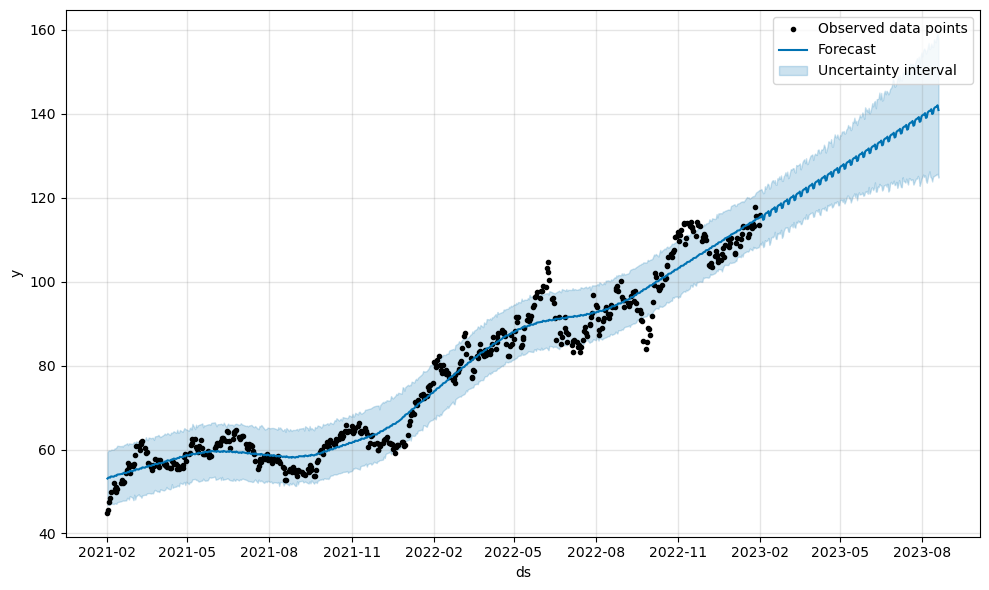

In [61]:
#The last 200 data is the forecast for the next 200 days

#The black dots are the actual data points and the blue line is the forecast with upper bounds.

#lower bounds indicated by the blue shaded area.

model_obj.plot(forecast, include_legend = True)
plt.show()

In [63]:
# calculate MAE between expected and predicted values
#forecast['yhat'][-212:-200].values
from sklearn.metrics import mean_absolute_error
y_true = df2['y'].values
y_pred = forecast['yhat'][:-200].values
mae = mean_absolute_error(y_true, y_pred)
print('Mean Absolute Error: %.3f' % mae)

Mean Absolute Error: 3.043


In [64]:
#So, the mae is 3.043.
#It means that there is an average error of 3.043
#between our actual value and the predicted value, which is not bad.
#The predicted outcomes can be plotted and compared with the actual values.


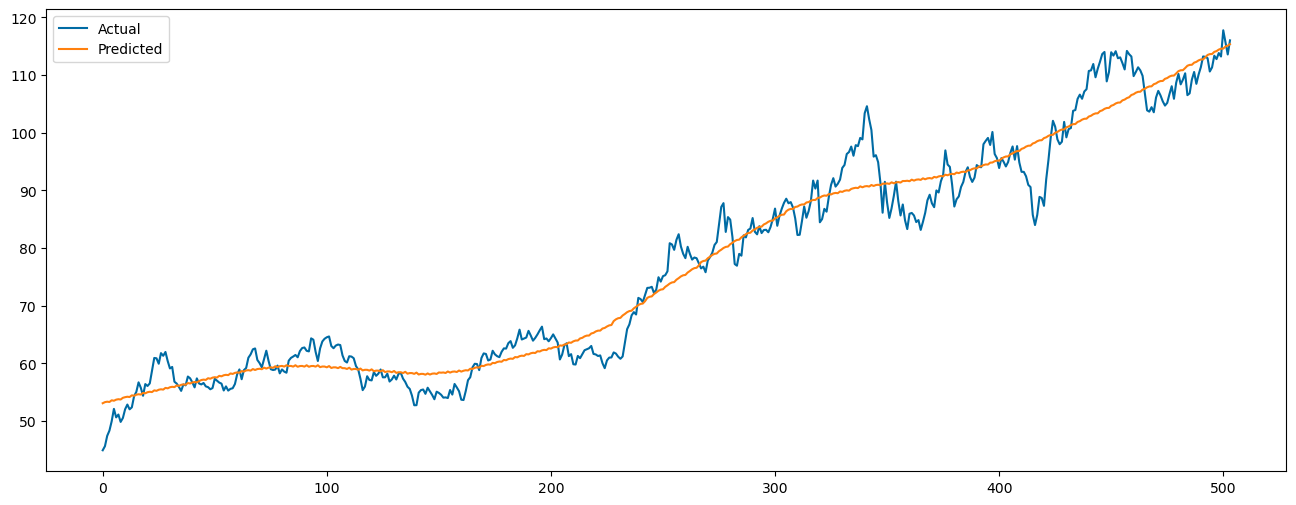

In [65]:
#The above figure demonstrates the actual and predicted curve of the traffic of sales.
plt.figure(figsize=(16,6))
plt.style.use("tableau-colorblind10")
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

<Figure size 1600x600 with 0 Axes>

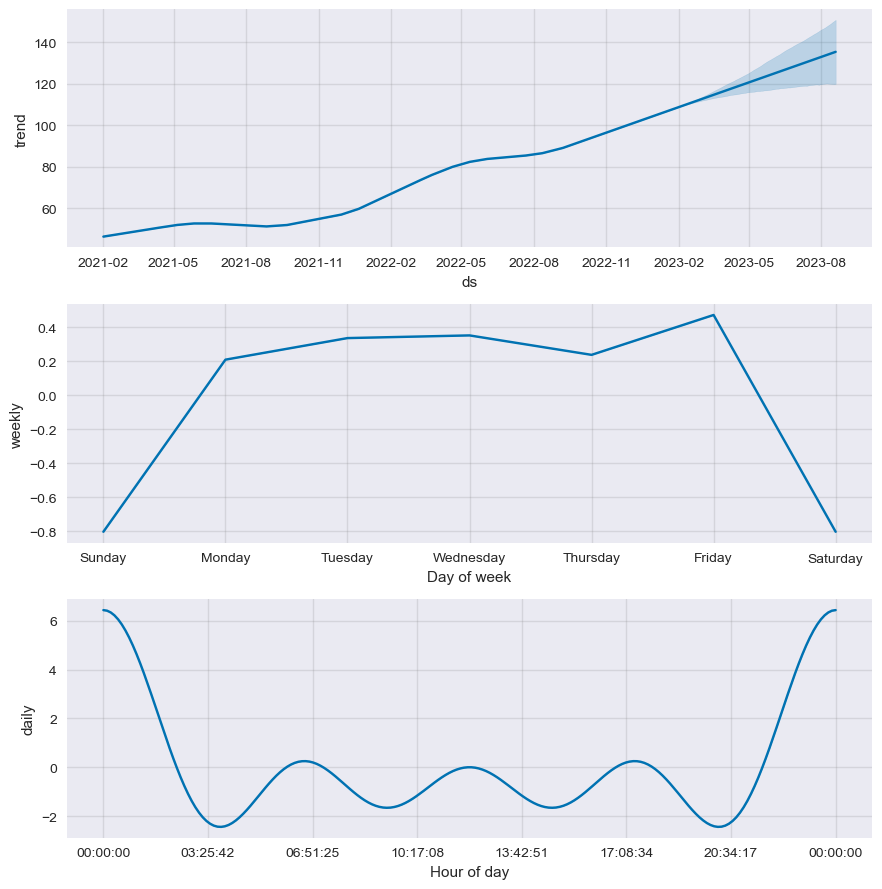

In [66]:
plt.figure(figsize=(16,6))
plt.style.use('seaborn')
plot  = model_obj.plot_components(forecast)
plt.show()

In [67]:
#The first plot demonstrates the linear increase in sales over time.
#The second figure emphasizes the fact that Tuesday, Wednesday and Friday of the week are when the stock price goes to the peak.
#The third plot demonstrates the hourly traffic of sales.